In [151]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [152]:
# Extracción del dataset
boston = pd.read_csv("/BostonHousing.csv")

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [153]:
# Separación de la variable dependiente e independiente
X = boston[["RM"]] #Para el ejemplo de regresión lineal simple se usa una sola columna
y = boston[["MEDV"]] #Para evitar errores la variable independiente debe ser un dataframe usar: df[[nombre_columna]]

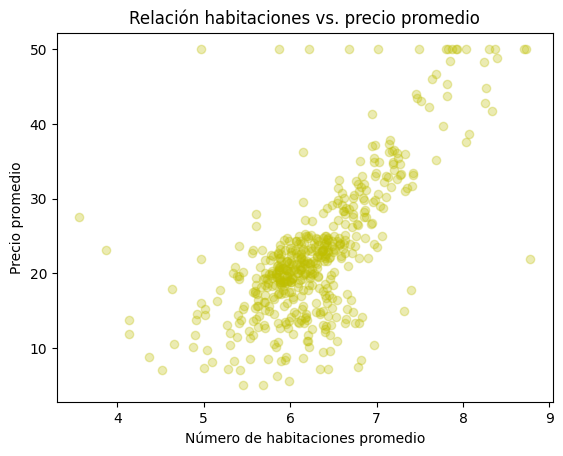

In [154]:
# Gráfica de las variables
plt.scatter(X,y, color = 'y', alpha = 0.3)

plt.title("Relación habitaciones vs. precio promedio")
plt.xlabel("Número de habitaciones promedio")
plt.ylabel("Precio promedio")

plt.show()


In [155]:
# Separación de los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [156]:
# Definición del modelo de aprendizaje automático
modelo = LinearRegression()

In [157]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [158]:
# Predicciones del modelo
y_pred = pd.Series(modelo.predict(X_test).flatten())

In [159]:
# Comparación datos de prueba vs. datos predichos
comparativa = pd.DataFrame({"habitaciones": X_test.iloc[:,0].reset_index(drop=True), "datos_prueba": y_test.iloc[:,0].reset_index(drop=True), "datos_predichos":y_pred})
comparativa


,habitaciones,datos_prueba,datos_predichos
0,6.849,28.2,27.605193
1,6.696,23.9,26.264835
2,6.030,16.6,20.430337
3,5.878,22.0,19.098740
4,5.362,20.8,14.578318
...,...,...,...
97,6.442,22.9,24.039667
98,8.266,44.8,40.018832
99,6.195,21.7,21.875821
100,5.837,10.2,18.739559


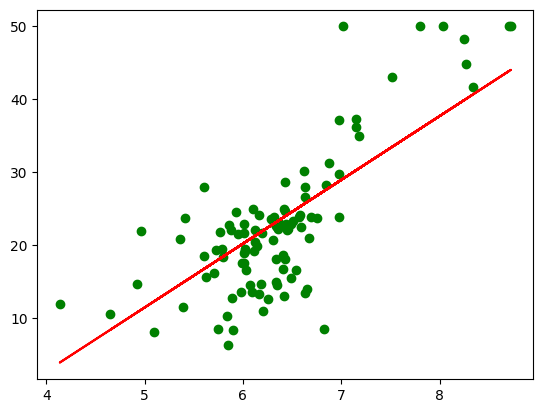

In [160]:
# Gráfica de comparación de datos reales y predichos
plt.scatter(X_test, comparativa.iloc[:,1], color = "g")
plt.plot(X_test, comparativa.iloc[:,2], color = 'r')

plt.show()

El modelo de regresión linel no es el adecuado para este caso, los valores reales varian mucho de los valores predichos

In [161]:
#Valores de la pendiente e intersección
pendiente = modelo.coef_
intercep = modelo.intercept_
print("Pendiente:", pendiente)
print("Intercepción:", intercep)

Pendiente: [[8.76050748]]
Intercepción: [-32.39552265]


In [162]:
#Ecuación de la rectab
print(f'y = {modelo.intercept_[0].round(2)} + {modelo.coef_[0][0].round(2)}x')

y = -32.4 + 8.76x


In [163]:
#Precisión del algoritmo
print(f"Precisión del modelo: {modelo.score(X_train, y_train)}")

Precisión del modelo: 0.45019179593422387
